## Importing Libraries

In [295]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate


## Loading and Understanding the Dataset

In [296]:
data = pd.read_csv(r"C:\Users\Aakash D\Downloads\Analytics\Omega\Python Projects\Movie Industry Project\Dataset used\Movie_Industry_Dataset.csv")

In [297]:
data.shape

(7668, 15)

In [298]:
data.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [299]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [300]:
data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


## Data Cleaning Process

### Lets begin with understanding if the data has any null values and what is the possible solution is for dealing with the null values.

In [301]:
# Finding out the absolute number of missing values for the dataset by columns.
data.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [302]:
# The null percent for each column.

for col in data.columns:
    pct_missing = round(np.mean(data[col].isna())*100,2) 
    print('{} = {}'.format(col, pct_missing))

# Here the majority missing values come from the budget column.

name = 0.0
rating = 1.0
genre = 0.0
year = 0.0
released = 0.03
score = 0.04
votes = 0.04
director = 0.0
writer = 0.04
star = 0.01
country = 0.04
budget = 28.31
gross = 2.46
company = 0.22
runtime = 0.05


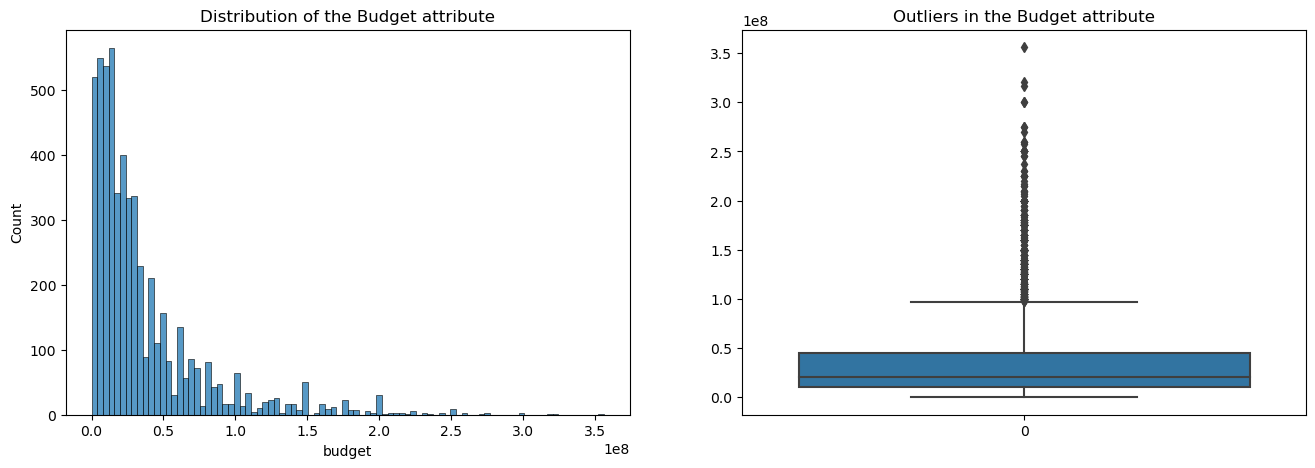

In [303]:
# Visualizing the budget column for better understanding

plt.figure(figsize=(16,5))

# Plot 1
plt.subplot(1,2,1)
sns.histplot(data = data.budget)
plt.title('Distribution of the Budget attribute')

# Plot 2
plt.subplot(1,2,2)
sns.boxplot(data = data.budget)
plt.title('Outliers in the Budget attribute')

plt.show()

# Here it can be inferred that that if we try to impute the nan values with median, it would lead to Misleading or unrealistic values in the dataset, which may cause problem in 
# analysis, so it will be a better approach to drop the Nan values.

In [304]:
# Dropping Nan Values

data.dropna(inplace=True)

# Also to reset the Index 

data.reset_index(drop=True)


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5416,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0
5417,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0
5418,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0
5419,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0


### Checking for duplicates in the dataset

In [305]:
data.duplicated().sum()

# With the output, we can conclude that there are no duplicates in the dataset.

0

### Changing the datatypes to required datatypes

In [306]:
data.dtypes

# The year column is an int datatype, so it should be converted to date format.
# The budget, the Gross, and other attributes can also be made into integer format, for simplicity in the visualizations and Analysis.

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [307]:
# Changing the dtypes for columns

#  For Budget attribute-

data["budget"] = data["budget"].astype('int64')

#  For Gross attribute-

data["gross"] = data["gross"].astype('int64')

#  For Votes attribute-

data['votes'] = data['votes'].astype('int64')

# For year attribute-

data['released'] = data['released'].str.extract(pat = '([0-9]{4})').astype('datetime64[ns]')

# There is a separate column for year, already in the dataset, but after some exploration, I found that the value in the year attribute and the corresponding value in the \n
# "released" attribute do not match, so its better to extract the year from the newly formatted "released" attribute and drop the originally present "year" attribute.

data["fixed_year"] = data["released"].dt.year
data.drop("year", axis = 1, inplace=True)
data.rename(columns={"fixed_year":"Year"}, inplace=True)



In [308]:
# Cleaning of any whitespaces from the column names if any.

data.columns.str.strip()

Index(['name', 'rating', 'genre', 'released', 'score', 'votes', 'director',
       'writer', 'star', 'country', 'budget', 'gross', 'company', 'runtime',
       'Year'],
      dtype='object')

In [309]:
# Renaming Columns 

data.rename(columns={"name":"Movie_Title","rating":"Rating","genre":"Movie_Genre","votes":"Votes","director":"Movie_Director",
                     "writer":"Movie_Writer","country":"Country","budget":"Budget","gross":"Gross_Earnings","company":"Production_Company"
                     ,"runtime":"Total_Runtime","score":"Audience_Score","star":"Star"}, inplace=True)

### With the above Data cleaning, we have a pretty clean dataset to start EDA and Deep Dive into finding insights and exploring any patterns between different attributes.

## Performing EDA

In [310]:
# Reference

data.head(20)

,Movie_Title,Rating,Movie_Genre,released,Audience_Score,Votes,Movie_Director,Movie_Writer,Star,Country,Budget,Gross_Earnings,Production_Company,Total_Runtime,Year
0,The Shining,R,Drama,1980-01-01,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980-01-01,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980-01-01,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980-01-01,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980-01-01,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
5,Friday the 13th,R,Horror,1980-01-01,6.4,123000,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000,39754601,Paramount Pictures,95.0,1980
6,The Blues Brothers,R,Action,1980-01-01,7.9,188000,John Landis,Dan Aykroyd,John Belushi,United States,27000000,115229890,Universal Pictures,133.0,1980
7,Raging Bull,R,Biography,1980-01-01,8.2,330000,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000,23402427,Chartoff-Winkler Productions,129.0,1980
8,Superman II,PG,Action,1981-01-01,6.8,101000,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000,108185706,Dovemead Films,127.0,1981
9,The Long Riders,R,Biography,1980-01-01,7.0,10000,Walter Hill,Bill Bryden,David Carradine,United States,10000000,15795189,United Artists,100.0,1980


## Finding out the Top Rated Movies in the dataset.




In [311]:
# Tabular Visualization for Better understanding-
Top_Rated_Movies = data.nlargest(10,['Votes', 'Audience_Score'])
columns = ["Year","Movie_Title", "Votes", "Audience_Score"]
Table = tabulate(Top_Rated_Movies[columns], headers = "keys", tablefmt = "pretty", showindex = False)
print(Table)

+------+---------------------------------------------------+---------+----------------+
| Year |                    Movie_Title                    |  Votes  | Audience_Score |
+------+---------------------------------------------------+---------+----------------+
| 1994 |             The Shawshank Redemption              | 2400000 |      9.3       |
| 2008 |                  The Dark Knight                  | 2400000 |      9.0       |
| 2010 |                     Inception                     | 2100000 |      8.8       |
| 1994 |                   Pulp Fiction                    | 1900000 |      8.9       |
| 1994 |                   Forrest Gump                    | 1900000 |      8.8       |
| 1999 |                    Fight Club                     | 1900000 |      8.8       |
| 2003 |   The Lord of the Rings: The Return of the King   | 1700000 |      8.9       |
| 2001 | The Lord of the Rings: The Fellowship of the Ring | 1700000 |      8.8       |
| 1999 |                    The 

## Finding out the Distribution of the Genres in the Dataset

Text(0.5, 1.0, 'Distribution of different Genres')

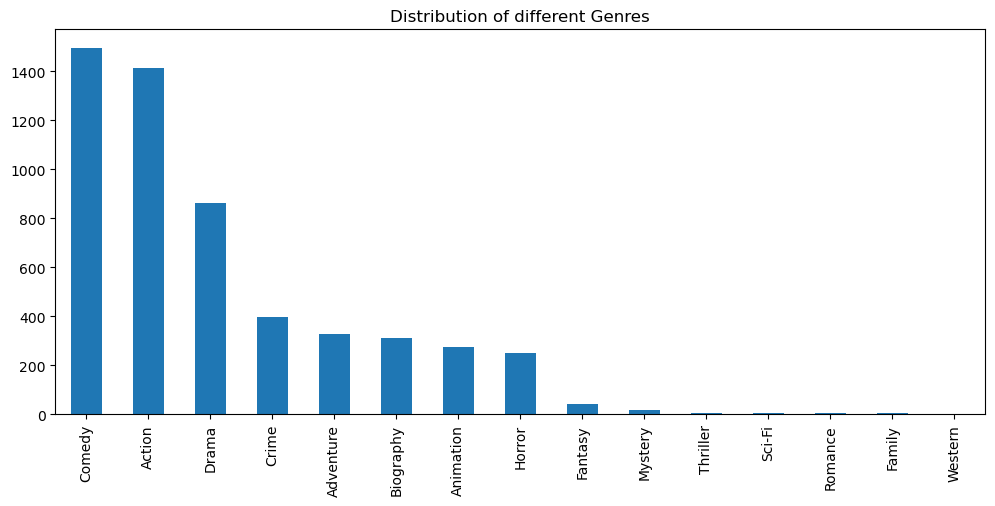

In [312]:
plt.figure(figsize=(12,5))
data["Movie_Genre"].value_counts().plot(kind="bar")
plt.title("Distribution of different Genres")


## Analysing the the number of movies released over the years

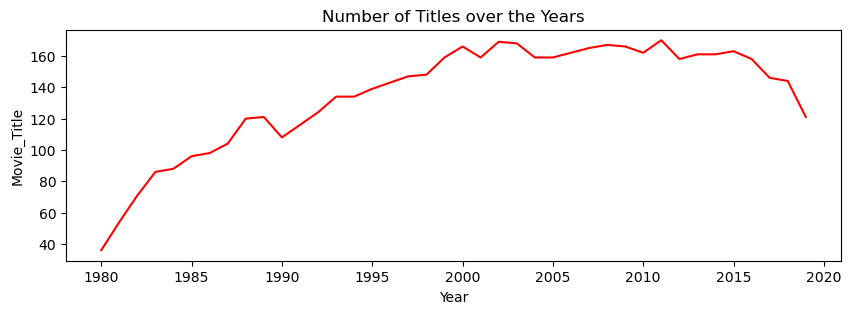

In [313]:
filtered_data = data[data["Year"] != 2020]
movies_per_year = filtered_data["Movie_Title"].groupby(filtered_data["Year"]).count().reset_index().sort_values(by= "Year", ascending=True)
plt.figure(figsize=(10,3))
sns.lineplot(data = movies_per_year, x = "Year", y = "Movie_Title", color ='r')
plt.title("Number of Titles over the Years")
plt.show()
# Here The Year 2020 is excluded because the data was available only till half of 2020, so it is excluded in this visualization

## Identifying Directors with the most Movie_Titles

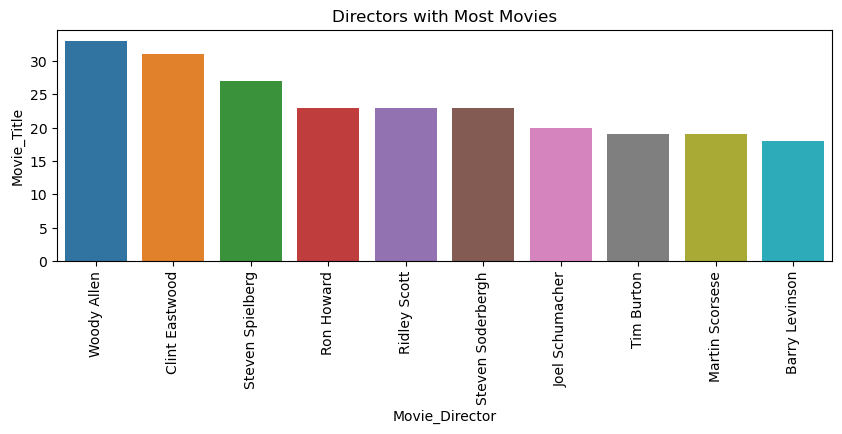

In [314]:
director_movie_count = data["Movie_Title"].groupby(data["Movie_Director"]).count().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(10,3))
sns.barplot(data = director_movie_count, x = "Movie_Director", y ="Movie_Title")
plt.xticks(rotation = 90)
plt.title("Directors with Most Movies")
plt.show()

## Movie Runtime Analysis by Genres

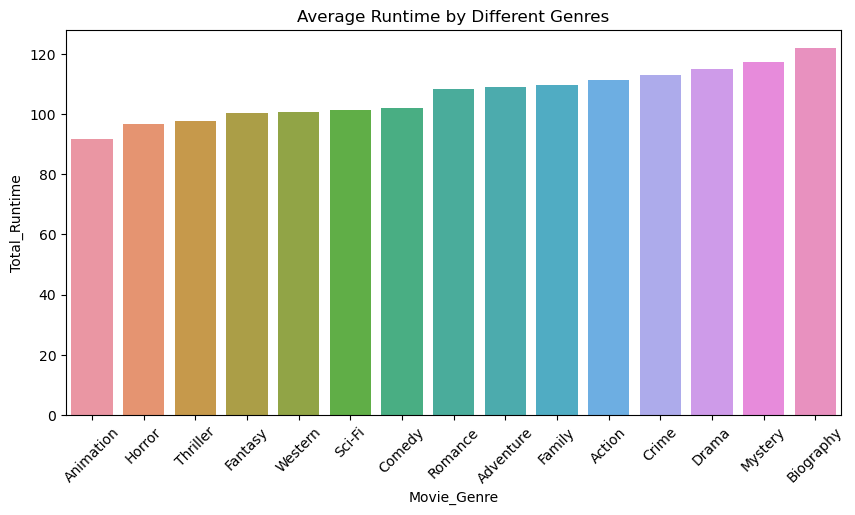

In [315]:
avg_runtime = round(data["Total_Runtime"].groupby(data["Movie_Genre"]).mean(),2).sort_values(ascending = True).reset_index()
plt.figure(figsize=(10,5))
sns.barplot(data=avg_runtime, x = "Movie_Genre",y="Total_Runtime")
plt.title("Average Runtime by Different Genres")
plt.xticks(rotation = 45)
plt.show()


## Looking for Correlations in the Dataset

### Possible Correlations-

1. There might be a high correlation between budget of the movie and gross earnings

2. There may be a correlation between the Production company and the gross earnings / Budget

3. There may be a correlation between the Director or Writer and the Gross Earnings / Budget

### Now to find the correlations to test the above theories and find any other hidden insights

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Plotting a visual to better understand if there is any relationship between the above mentioned variables

Text(0.5, 1.0, 'Regplot for understanding Relationship between the Attributes')

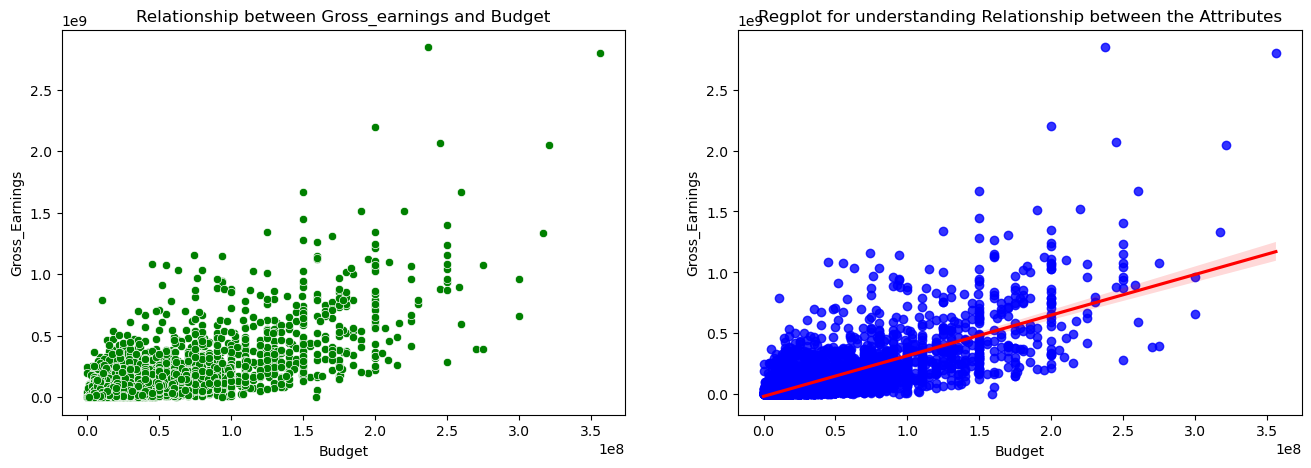

In [316]:
#plot 1

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.scatterplot(data = data, x = "Budget", y = "Gross_Earnings", color = "green")
plt.title("Relationship between Gross_earnings and Budget")

#plot 2

plt.subplot(1,2,2)
sns.regplot(data = data, x = "Budget", y = "Gross_Earnings", line_kws = {"color":"red"}, color = "blue")
plt.title("Regplot for understanding Relationship between the Attributes")

# With this visual representation we can infer that there is a positive correlation between the budget and gross earnings attributes 

## To check if there are any other attributes with high correlation with budget

In [317]:
correlation_set = data.drop(columns="Year", axis=1)
correlation_set.corr()

,Audience_Score,Votes,Budget,Gross_Earnings,Total_Runtime
Audience_Score,1.000000,0.474256,0.072001,0.222556,0.414068
Votes,0.474256,1.000000,0.439675,0.614751,0.352303
Budget,0.072001,0.439675,1.000000,0.740247,0.318695
Gross_Earnings,0.222556,0.614751,0.740247,1.000000,0.275796
Total_Runtime,0.414068,0.352303,0.318695,0.275796,1.000000


Text(0.5, 1.0, 'Correlation between Numerical Attributes')

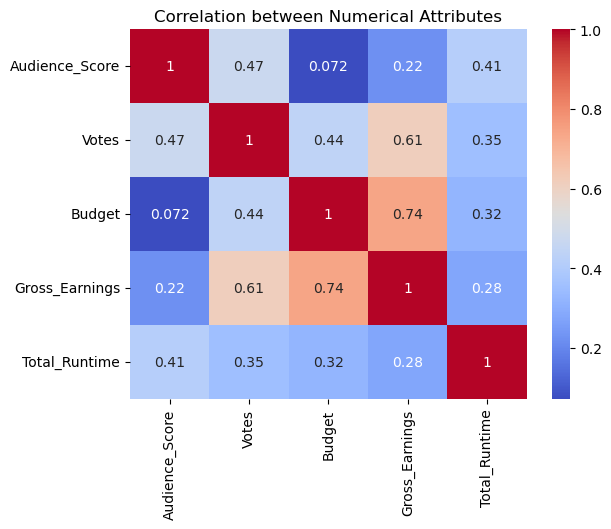

In [320]:
# To better understand the correlation matrix, plotting Heatmap

sns.heatmap(correlation_set.corr(), annot = True, cmap='coolwarm')
plt.title("Correlation between Numerical Attributes")



## Findings from the Correlation Matrix

1. Budget and Gross_Earnings-
There is a high positive correlation of 0.74 between Budget and Gross Earnings that suggests that movies with higher budgets tend to have high Gross Earnings, this was also very apparent from the above scatter and reg plots which showed a visual representation of the positive relationship among the 2 attributes.

2. Audience_Score and Total_Runtime-
It can be seen that there is a positive correlation of 0.41 between the attributes, so It can be said that movies with higher runtime may receive higher Audience scores.

3. Votes and Budget-
There is a positive correlation of 0.44, which suggests that movies with higher budgets tend to get more votes.

4. Gross_Earnings and Votes-
It is apparent that a high correlation of 0.61, between the attributes "Votes" and "Gross_Earnings" suggest that Movies with higher votes may perform better at the box office as higher audience engagement may lead to higher gross earnings because of increased ticket sales

5. Votes and Total_Runtime-
There is not a high correlation but there is some relationship between the attributes votes and Total_Runtime, it suggests that longer movies tend to have higher votes. The
correlation is about 0.35, which is not that high.

The Above findings are true to a certain extent but there are many other factors that influence the attributes.

## To check if there is any correlation between categorical variables and Budget and Gross Earnings

In [321]:
# Converting Categorical Data to Numeric data, to find the correlation between various categories and Budget and Gross Earnings of a Film

categorical_data = data.drop(columns=["released","Audience_Score","Votes","Year","Total_Runtime","Movie_Title"], axis=1)

for cols in categorical_data.columns:
    if (categorical_data[cols].dtype == "object"):
        categorical_data[cols] = categorical_data[cols].astype('category')
        categorical_data[cols] = categorical_data[cols].cat.codes

categorical_data

,Rating,Movie_Genre,Movie_Director,Movie_Writer,Star,Country,Budget,Gross_Earnings,Production_Company
0,6,6,1795,2832,699,46,19000000,46998772,1426
1,6,1,1578,1158,214,47,4500000,58853106,452
2,4,0,757,1818,1157,47,18000000,538375067,945
3,4,4,889,1413,1474,47,3500000,83453539,1108
4,6,4,719,351,271,47,6000000,39846344,1083
...,...,...,...,...,...,...,...,...,...
7648,6,0,16,2390,1812,47,90000000,426505244,452
7649,4,0,852,2309,147,47,85000000,319715683,1108
7650,4,1,1809,2827,1470,47,175000000,245487753,1397
7651,4,1,294,2091,640,6,135000000,111105497,12


### Visualization of the correlation matrix

<AxesSubplot:>

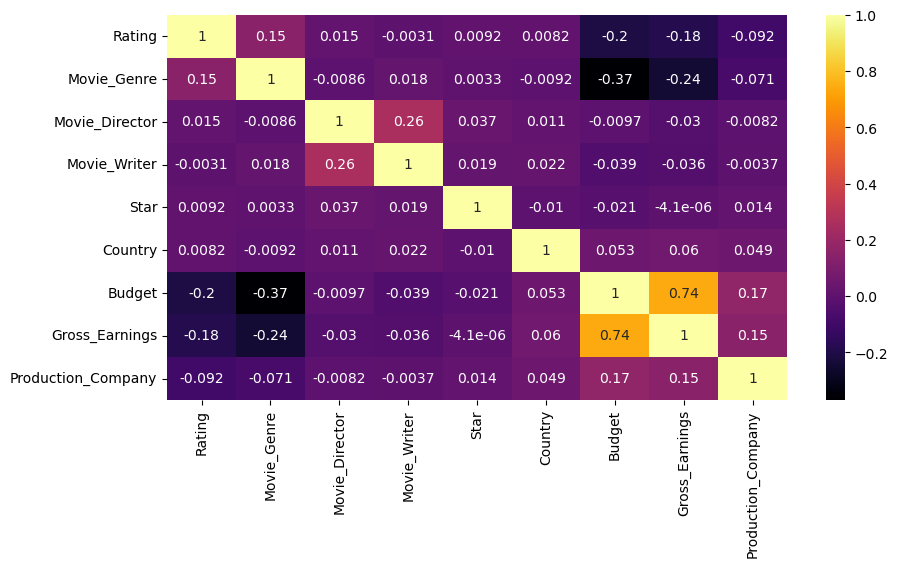

In [322]:
plt.figure(figsize=(10,5))
sns.heatmap(categorical_data.corr(), annot = True, cmap='inferno')

## Findings from the above visualization

1. It can be concluded that there is no significant relationship between the director of the movie and the budget or Gross Earnings for a movie.

2. Production Company has a positive relationship for Budget and Gross_earnings with a correlation of 0.17 and 0.15 respectively, but this is correlation is not high enough to conclude that there is a significant relationship among the attributes.

==================================================================================================================================================================================